Model Accuracy: 50.00%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predictions:
[[1.]
 [0.]
 [1.]
 [0.]]


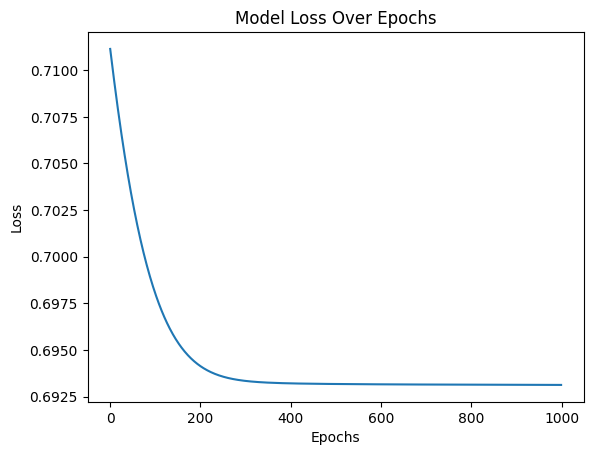

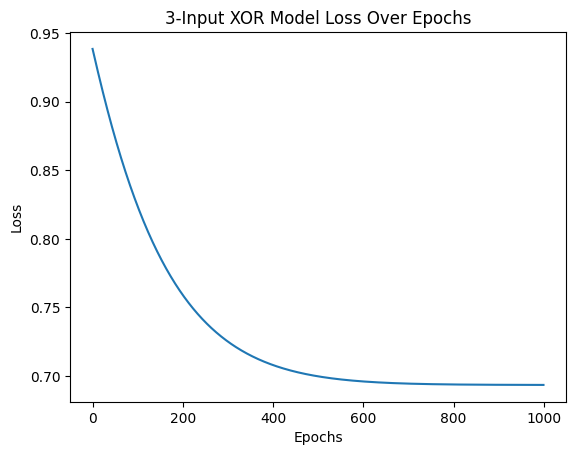

Training with SGD optimizer...
Optimizer: SGD, Loss: 0.6931, Accuracy: 50.00%
Training with Adam optimizer...
Optimizer: Adam, Loss: 0.0261, Accuracy: 100.00%
Training with RMSprop optimizer...
Optimizer: RMSprop, Loss: 0.0005, Accuracy: 100.00%


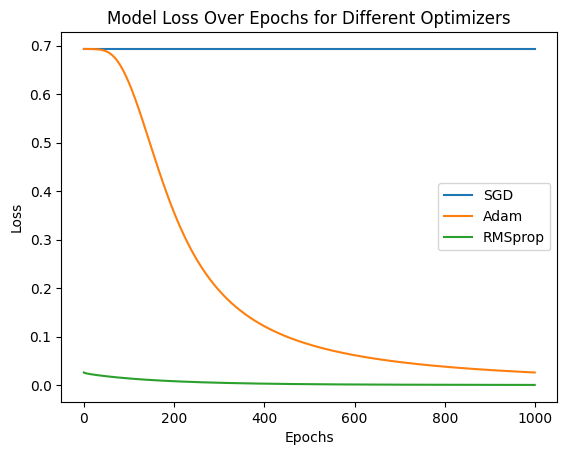

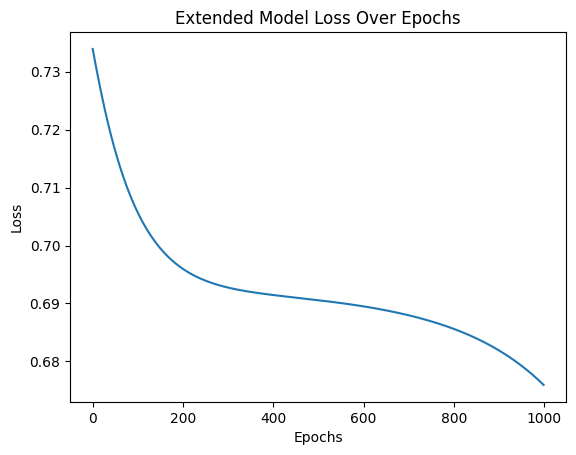

Training with relu activation function...
Activation Function: relu, Loss: 0.6931, Accuracy: 50.00%
Training with tanh activation function...
Activation Function: tanh, Loss: 0.6547, Accuracy: 75.00%
Training with sigmoid activation function...
Activation Function: sigmoid, Loss: 0.6875, Accuracy: 50.00%


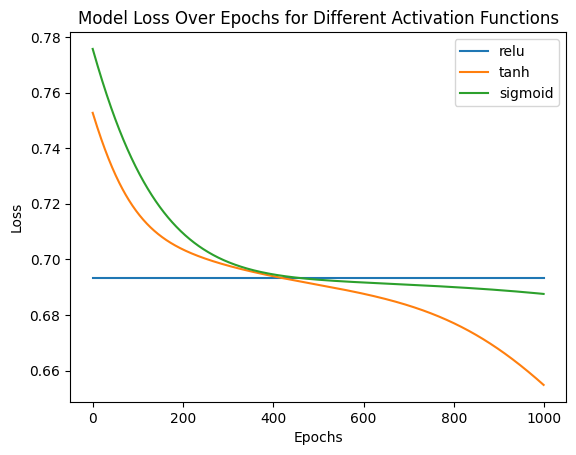

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam, RMSprop

# Define XOR input and output
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Define the model
model = Sequential()
model.add(Dense(2, input_dim=2, activation='sigmoid'))  # Hidden layer with 2 neurons
model.add(Dense(1, activation='sigmoid'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=1000, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X, y, verbose=0)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Predict the XOR outputs
predictions = model.predict(X)
print("Predictions:")
print(np.round(predictions))

# Plot the training loss
plt.plot(history.history['loss'])
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Define 3-input XOR problem
X_3input = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                     [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
y_3input = np.array([[0], [1], [1], [0], [1], [0], [0], [1]])

# Define a new model for 3-input XOR
model_3input = Sequential()
model_3input.add(Dense(4, input_dim=3, activation='sigmoid'))
model_3input.add(Dense(1, activation='sigmoid'))

model_3input.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_3input = model_3input.fit(X_3input, y_3input, epochs=1000, verbose=0)

# Plot loss for 3-input XOR problem
plt.plot(history_3input.history['loss'])
plt.title('3-Input XOR Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Experiment with different optimizers
optimizers = {'SGD': SGD(learning_rate=0.1), 'Adam': Adam(learning_rate=0.01), 'RMSprop': RMSprop(learning_rate=0.01)}
results = {}

for name, opt in optimizers.items():
    print(f"Training with {name} optimizer...")
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    history_opt = model.fit(X, y, epochs=1000, batch_size=4, verbose=0)
    loss, accuracy = model.evaluate(X, y, verbose=0)
    results[name] = history_opt.history['loss']
    print(f"Optimizer: {name}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Plot the loss curves for different optimizers
for name, loss in results.items():
    plt.plot(loss, label=name)

plt.title('Model Loss Over Epochs for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model with more neurons and an additional hidden layer
model_extended = Sequential()
model_extended.add(Dense(4, input_dim=2, activation='sigmoid'))  # First hidden layer with 4 neurons
model_extended.add(Dense(2, activation='sigmoid'))  # Second hidden layer with 2 neurons
model_extended.add(Dense(1, activation='sigmoid'))  # Output layer

model_extended.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history_extended = model_extended.fit(X, y, epochs=1000, verbose=0)

# Plot loss for extended model
plt.plot(history_extended.history['loss'])
plt.title('Extended Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Test different activation functions
activation_functions = ['relu', 'tanh', 'sigmoid']
results_activations = {}

for activation in activation_functions:
    print(f"Training with {activation} activation function...")
    model_activation = Sequential()
    model_activation.add(Dense(2, input_dim=2, activation=activation))
    model_activation.add(Dense(1, activation='sigmoid'))

    model_activation.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_activation = model_activation.fit(X, y, epochs=1000, verbose=0)
    results_activations[activation] = history_activation.history['loss']
    loss, accuracy = model_activation.evaluate(X, y, verbose=0)
    print(f"Activation Function: {activation}, Loss: {loss:.4f}, Accuracy: {accuracy * 100:.2f}%")

# Plot loss curves for different activation functions
for activation, loss in results_activations.items():
    plt.plot(loss, label=activation)

plt.title('Model Loss Over Epochs for Different Activation Functions')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
